In [204]:
import pandas as pd
import numpy as np

df = pd.read_json("benjamin_dataset.json", orient='records')

In [205]:
print(df.shape)
df.drop(columns=["label"], inplace=True)
print(df.shape)

(15151, 501)
(15151, 500)


In [206]:
total_rows = 15151
n_rows = 15151
df.drop(df.tail(total_rows - n_rows).index,inplace=True)

df_new = df.copy()
print(df_new.shape)

(15151, 500)


In [207]:
for column in df.columns:
    if (df[column].std() < 0.0001):
        print("DEL by STD", column, df[column].std())
        df_new.drop(columns=[column], inplace=True)
        continue
    if (df[column].count() != n_rows):
        print("DEL by COUNT", column, df[column].count())
        df_new.drop(columns=[column], inplace=True)
        continue
    print("OK", column, df[column].count(), df[column].std())

OK 0 15151 0.11303403304038283
OK 1 15151 0.2272616130785687
OK 10 15151 0.3228532261902704
OK 100 15151 0.36260087951392966
OK 101 15151 0.2531686941659372
OK 102 15151 31.69952899412398
OK 103 15151 0.24286294683740214
DEL by COUNT 104 318
OK 105 15151 0.08406080445861039
DEL by COUNT 106 986
DEL by COUNT 107 607
DEL by COUNT 108 2912
OK 109 15151 0.6122821435753306
OK 11 15151 0.3552703958285033
OK 110 15151 0.5694632013873417
OK 111 15151 0.38966231003266877
DEL by COUNT 112 986
OK 113 15151 0.2531686941659372
OK 114 15151 0.1415746393411291
DEL by COUNT 115 607
OK 116 15151 0.4303337495091732
OK 117 15151 0.5449519455968733
OK 118 15151 0.22395521834101287
OK 119 15151 0.470995820002833
OK 12 15151 0.22412648045576994
DEL by COUNT 120 2260
OK 121 15151 0.3253168421102119
OK 122 15151 0.3552703958285033
DEL by COUNT 123 5717
DEL by COUNT 124 607
DEL by COUNT 125 1605
OK 126 15151 0.10741271102842014
OK 127 15151 0.2609943608716517
OK 128 15151 0.12340635500405725
OK 129 15151 0.409

DEL by COUNT 358 986
OK 359 15151 0.3653295564147925
DEL by COUNT 36 11027
OK 360 15151 0.2027862165431782
OK 361 15151 0.2742390535422794
OK 362 15151 34.203170171952735
OK 363 15151 0.39793022335528877
OK 364 15151 0.25105914270357804
OK 365 15151 0.20658702082312053
DEL by COUNT 366 986
OK 367 15151 33.36042498958508
OK 368 15151 0.24080925687747623
OK 369 15151 0.1550245291550573
DEL by COUNT 37 2912
OK 370 15151 0.36121683430731283
DEL by COUNT 371 2912
OK 372 15151 0.1269793298342195
OK 373 15151 0.061755382684350366
OK 374 15151 31.658129037093474
DEL by COUNT 375 2912
OK 376 15151 0.12495265858701687
OK 377 15151 1.0157307355578002
OK 378 15151 0.2596696688485439
DEL by COUNT 379 19
OK 38 15151 0.14813686465056777
OK 380 15151 0.4070369523622392
OK 381 15151 0.02398007571307387
OK 382 15151 0.36826013867899393
DEL by COUNT 383 41
DEL by COUNT 384 5717
DEL by COUNT 385 11027
OK 386 15151 0.3889157333352668
DEL by COUNT 387 1605
OK 388 15151 0.037209755268225196
DEL by COUNT 389 

In [208]:
df_new.shape

(15151, 323)

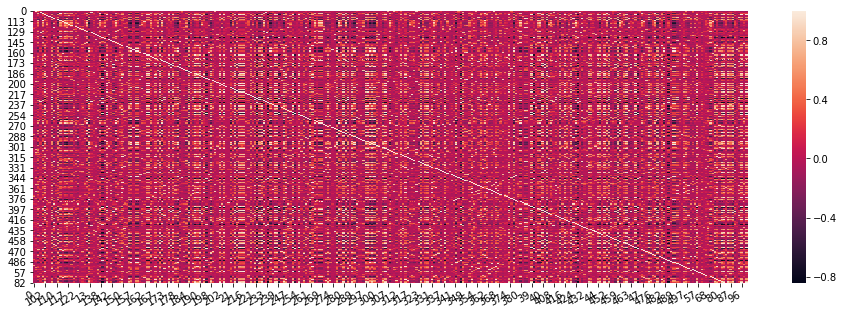

In [209]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
corr_matrix = df_new.corr()
plt.rcParams['figure.figsize'] = (16, 5)
g = sns.heatmap(corr_matrix)
g.set_xticklabels(g.get_xticklabels(), verticalalignment='top', horizontalalignment='right', rotation=30);
plt.savefig('corr_heatmap.png', dpi=300, bbox_inches='tight')

In [225]:
# Create correlation matrix
corr_matrix = df_new.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.801)]

In [226]:
len(to_drop)

223

In [227]:
df_new.shape[1] - len(to_drop)

100

In [228]:
df_new.drop(df_new[to_drop], axis=1, inplace=True)

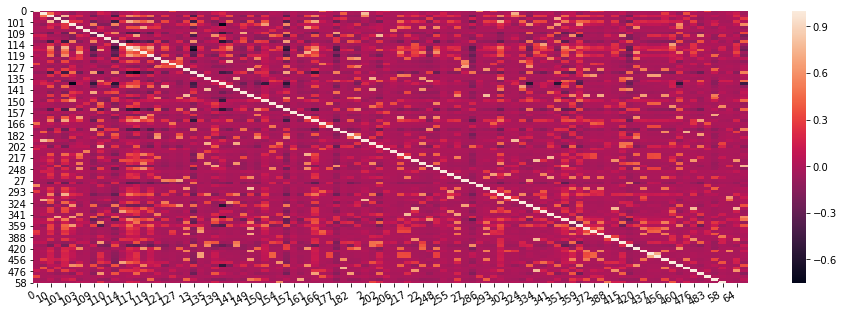

In [229]:
corr_matrix = df_new.corr()
plt.rcParams['figure.figsize'] = (16, 5)
g = sns.heatmap(corr_matrix)
g.set_xticklabels(g.get_xticklabels(), verticalalignment='top', horizontalalignment='right', rotation=30);
plt.savefig('corr_heatmap.png', dpi=300, bbox_inches='tight')

In [230]:
df_new.columns

Index(['0', '1', '10', '100', '101', '102', '103', '105', '109', '11', '110',
       '111', '114', '116', '117', '118', '119', '12', '121', '126', '127',
       '128', '13', '134', '135', '137', '139', '14', '141', '142', '149',
       '15', '150', '152', '154', '155', '157', '160', '161', '165', '166',
       '173', '177', '18', '182', '199', '2', '20', '202', '205', '206', '21',
       '217', '218', '22', '237', '248', '252', '255', '267', '27', '270',
       '286', '291', '293', '300', '302', '307', '324', '328', '334', '339',
       '341', '347', '351', '353', '359', '369', '372', '38', '388', '41',
       '415', '418', '420', '431', '437', '447', '456', '46', '460', '469',
       '476', '48', '483', '490', '58', '60', '64', '87'],
      dtype='object')

In [231]:
df.shape

(15151, 500)

In [232]:
index = 0
for column in df.columns:
    if column in df_new.columns: 
        print(index)
    index = index + 1

0
1
2
3
4
5
6
8
12
13
14
15
18
20
21
22
23
24
26
31
32
33
35
40
41
43
45
46
48
49
56
57
58
60
62
63
65
69
70
74
75
83
87
90
93
111
112
113
116
119
120
124
132
133
135
154
166
171
174
187
190
191
208
214
216
225
227
232
251
255
262
267
270
276
281
283
289
300
304
312
321
346
352
355
358
370
376
387
397
401
402
411
419
423
427
435
454
457
461
486
